https://www.kaggle.com/datasets/umuttuygurr/city-lifestyle-segmentation-dataset 

____________________________________________________________________________________________________________________________________________________

In [57]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import textwrap
import warnings
warnings.filterwarnings("ignore")

____________________________________________________________________________________________________________________________________________________

In [59]:
df = pd.read_csv("city_lifestyle_dataset.csv")
for x in df.columns:
    print(f"{x:35}  →  {df[x].dtype}")

city_name                            →  object
country                              →  object
population_density                   →  int64
avg_income                           →  int64
internet_penetration                 →  float64
avg_rent                             →  int64
air_quality_index                    →  int64
public_transport_score               →  float64
happiness_score                      →  float64
green_space_ratio                    →  float64


In [ ]:
df.head(10)

,city_name,country,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio
0,Old Vista,Europe,2775,3850,86.4,1310,43,52.0,8.5,23.8
1,Beachport,Europe,3861,3700,78.1,1330,42,62.8,8.1,33.1
2,Valleyborough,Europe,2562,4310,80.1,1330,39,73.2,8.5,40.2
3,City,Europe,3192,3970,81.2,1480,60,49.2,8.5,43.6
4,Falls,Europe,3496,4320,100.0,1510,64,93.7,8.5,42.5
5,North Falls,Europe,1444,4640,78.5,1620,35,51.6,8.4,20.3
6,Hillhaven,Europe,1233,3450,84.2,1080,55,47.5,8.5,50.0
7,Gardenton,Europe,936,3610,72.4,1520,47,59.5,7.9,35.6
8,Springsville,Europe,2938,5220,100.0,1950,53,60.0,8.5,34.8
9,North Ridge,Europe,3513,3330,88.7,1040,76,60.1,7.7,31.7


In [61]:
df.isnull().sum()

city_name                 0
country                   0
population_density        0
avg_income                0
internet_penetration      0
avg_rent                  0
air_quality_index         0
public_transport_score    0
happiness_score           0
green_space_ratio         0
dtype: int64

____________________________________________________________________________________________________________________________________________________

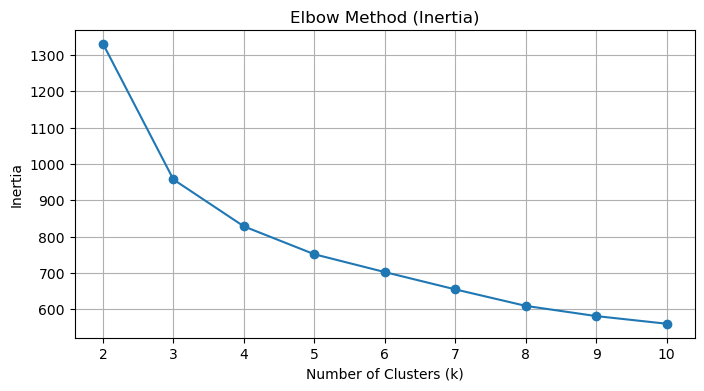

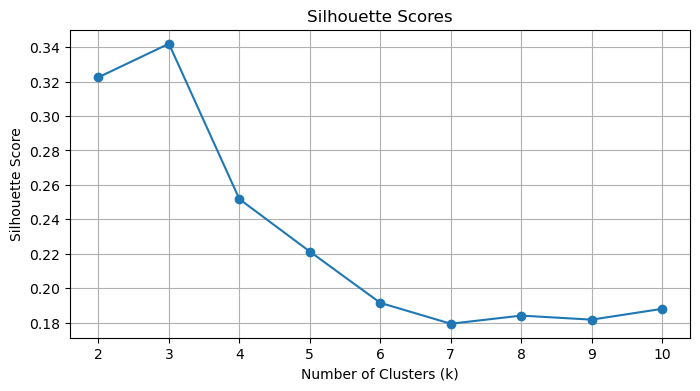

In [ ]:
# --------------------------------------
# 2. Select clustering features
# --------------------------------------
features = [
    'population_density',
    'avg_income',
    'internet_penetration',
    'avg_rent',
    'air_quality_index',
    'public_transport_score',
    'green_space_ratio'
]

X = df[features].values

# --------------------------------------
# 3. Scale the data
# --------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------------------
# 4. Compute inertia & silhouette scores
# --------------------------------------
inertias = []
silhouette_scores = []
K_values = range(2, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# --------------------------------------
# 5. Plot Inertia
# --------------------------------------
plt.figure(figsize=(8,4))
plt.plot(K_values, inertias, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# --------------------------------------
# 6. Plot Silhouette Scores
# --------------------------------------
plt.figure(figsize=(8,4))
plt.plot(K_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [63]:
features = [
    'population_density',
    'avg_income',
    'internet_penetration',
    'avg_rent',
    'air_quality_index',
    'public_transport_score',
    'green_space_ratio'
]

X = df[features].values

# --------------------------------------
# 3. Scale features
# --------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------------------
# 4. Run KMeans with k = 3
# --------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

In [64]:
cluster_means = df.groupby("cluster")[features].mean().round(2)
display(cluster_means)

,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,green_space_ratio
cluster,,,,,,,
0,8193.39,2552.64,73.27,891.25,97.25,63.54,25.25
1,2972.77,1518.80,56.73,524.89,77.78,41.46,36.12
2,2353.19,3857.65,86.74,1385.07,53.06,61.22,37.18


Cluster 0: High-Density Urban Cities - These cities have extremely high population density.

Cluster 1: Low-Income Developing Cities - The residents of these cities have comparitevely low income.

Cluster 2: High-Income Modern Cities - The residents of these cities have comparitevely high income.

In [65]:
df.head()

,city_name,country,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio,cluster
0,Old Vista,Europe,2775,3850,86.4,1310,43,52.0,8.5,23.8,2
1,Beachport,Europe,3861,3700,78.1,1330,42,62.8,8.1,33.1,2
2,Valleyborough,Europe,2562,4310,80.1,1330,39,73.2,8.5,40.2,2
3,City,Europe,3192,3970,81.2,1480,60,49.2,8.5,43.6,2
4,Falls,Europe,3496,4320,100.0,1510,64,93.7,8.5,42.5,2


In [66]:
cluster_name_map = {
    0: "High-Density Urban Cities",
    1: "Low-Income Developing Cities",
    2: "High-Income Modern Cities"
}

# Add a new column with cluster names
df["cluster_name"] = df["cluster"].map(cluster_name_map)

# Preview results
df.head()

,city_name,country,population_density,avg_income,internet_penetration,avg_rent,air_quality_index,public_transport_score,happiness_score,green_space_ratio,cluster,cluster_name
0,Old Vista,Europe,2775,3850,86.4,1310,43,52.0,8.5,23.8,2,High-Income Modern Cities
1,Beachport,Europe,3861,3700,78.1,1330,42,62.8,8.1,33.1,2,High-Income Modern Cities
2,Valleyborough,Europe,2562,4310,80.1,1330,39,73.2,8.5,40.2,2,High-Income Modern Cities
3,City,Europe,3192,3970,81.2,1480,60,49.2,8.5,43.6,2,High-Income Modern Cities
4,Falls,Europe,3496,4320,100.0,1510,64,93.7,8.5,42.5,2,High-Income Modern Cities


In [67]:
df["cluster_name"].value_counts()

cluster_name
High-Income Modern Cities       136
Low-Income Developing Cities     92
High-Density Urban Cities        72
Name: count, dtype: int64

____________________________________________________________________________________________________________________________________________________

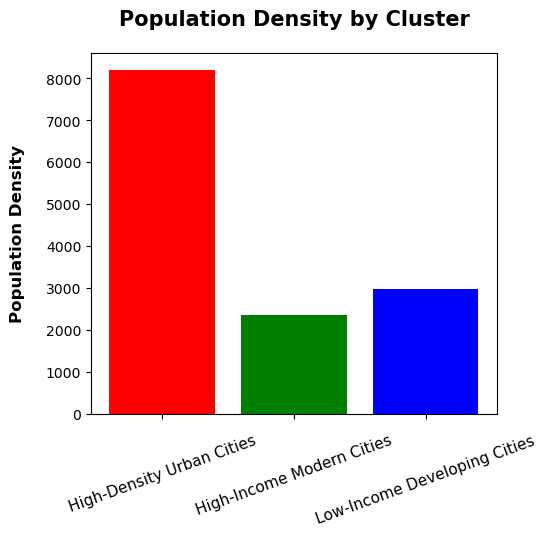

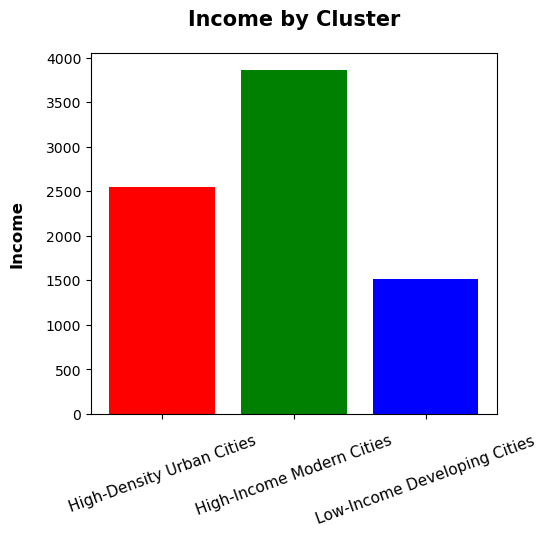

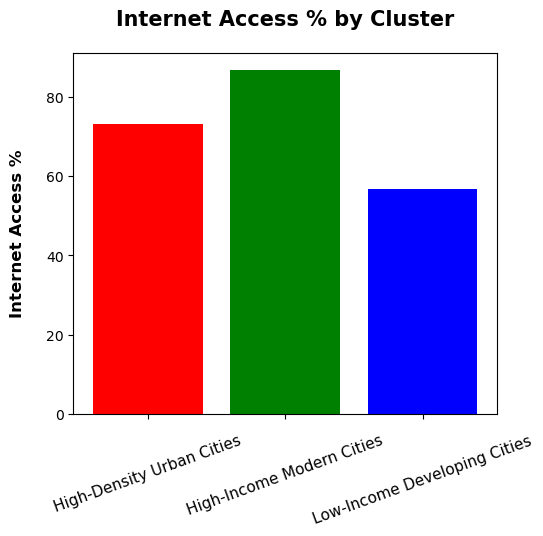

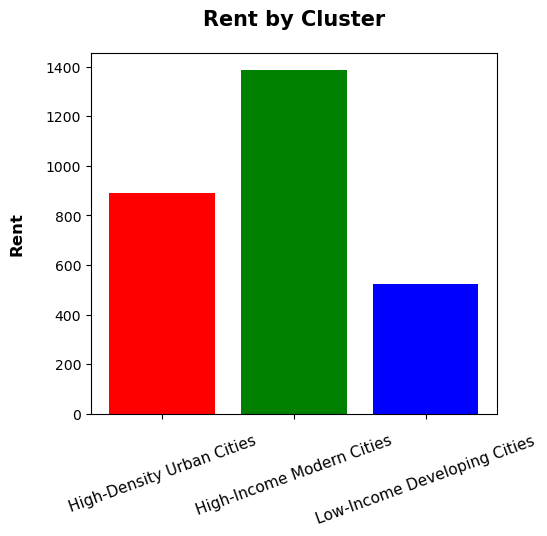

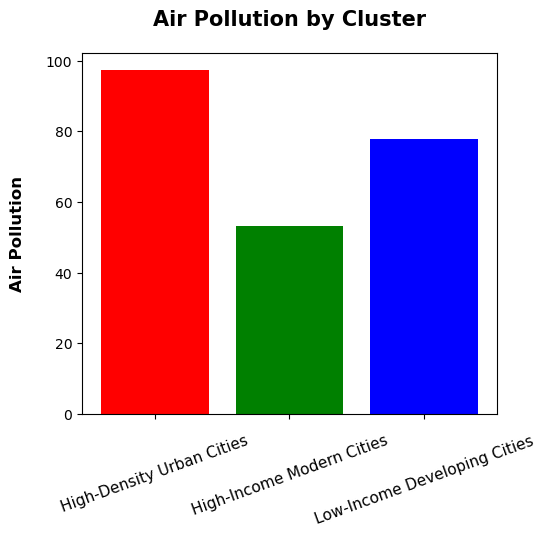

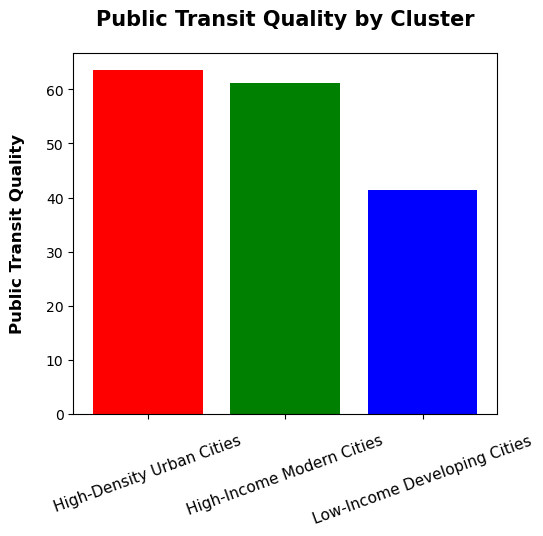

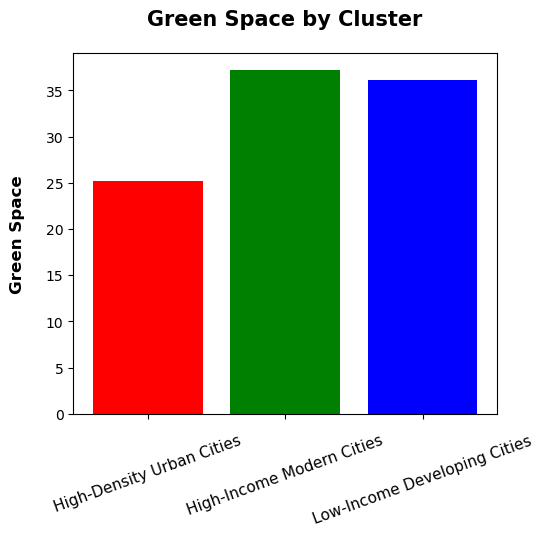

In [ ]:
color_map = {
    'High-Density Urban Cities': 'red',
    'Low-Income Developing Cities': 'blue',
    'High-Income Modern Cities': 'green'
}

short_features = ['Population Density', 'Income', 'Internet Access %',
                  'Rent', 'Air Pollution', 'Public Transit Quality', 'Green Space']

features = [
    'population_density', 'avg_income', 'internet_penetration',
    'avg_rent', 'air_quality_index', 'public_transport_score',
    'green_space_ratio'
]

# Raw means grouped by your descriptive cluster names
cluster_means = df.groupby('cluster_name')[features].mean()

# 7 barplots
for feat, short in zip(features, short_features):
    plt.figure(figsize=(6,6))

    # Apply colors in the order of cluster_means index
    colors = [color_map[name] for name in cluster_means.index]

    plt.bar(cluster_means.index, cluster_means[feat], color=colors)

    # Add title + extra padding
    plt.title(f"{short} by Cluster", fontsize=15, fontweight="bold", pad=20)

    # Add y-axis padding
    plt.ylabel(short, labelpad=15, fontsize=12, fontweight="bold")

    # Rotate x labels + padding
    plt.xticks(rotation=20, fontsize=11)
    plt.gca().tick_params(axis='x', pad=10)  # x-axis padding

    # Add overall plot padding
    plt.tight_layout(pad=3)

    plt.show()

Cluster Feature Analysis:

----- #TODO

____________________________________________________________________________________________________________________________________________________

In [69]:
y = df["happiness_score"]

# --------------------------------------
# List of all lifestyle predictor variables (X)
# --------------------------------------
predictors = [
    "population_density",
    "avg_income",
    "internet_penetration",
    "avg_rent",
    "air_quality_index",
    "public_transport_score",
    "green_space_ratio"
]

# --------------------------------------
# Run separate linear regressions
# --------------------------------------
results = []

for x in predictors:
    X = df[[x]].values
    y = df["happiness_score"].values

    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    results.append({
        "Predictor": x,
        "R2": round(r2, 4),
        "Coefficient": round(model.coef_[0], 4),
        "Intercept": round(model.intercept_, 4)
    })

results_df = pd.DataFrame(results)
print(results_df)

                Predictor      R2  Coefficient  Intercept
0      population_density  0.1597      -0.0002     7.5350
1              avg_income  0.7361       0.0012     3.2395
2    internet_penetration  0.5928       0.0763     0.9754
3                avg_rent  0.6648       0.0030     3.6232
4       air_quality_index  0.5439      -0.0491    10.1392
5  public_transport_score  0.2152       0.0532     3.6822
6       green_space_ratio  0.0888       0.0532     4.8340


We ran seven separate linear regressions to see which lifestyle features best predict happiness. Four features showed strong relationships—avg income, avg rent, internet penetration, and air quality—so we kept these for analysis. 

The remaining features (green space, population density, and public transport score) had very low R² values, meaning they explained little of the variation in happiness, so we let's exclude them as we continue to interpret our models.

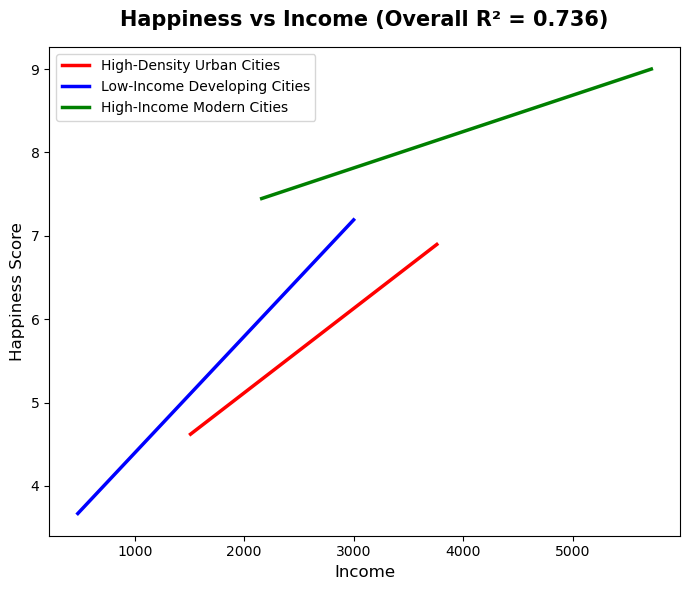

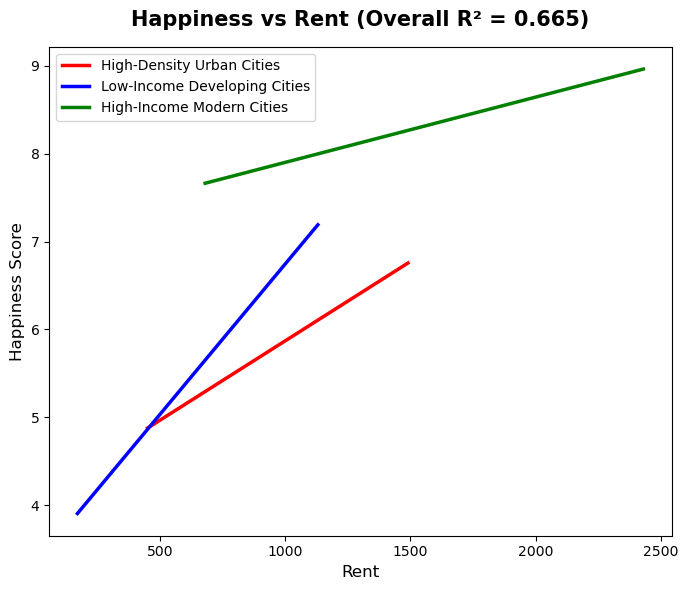

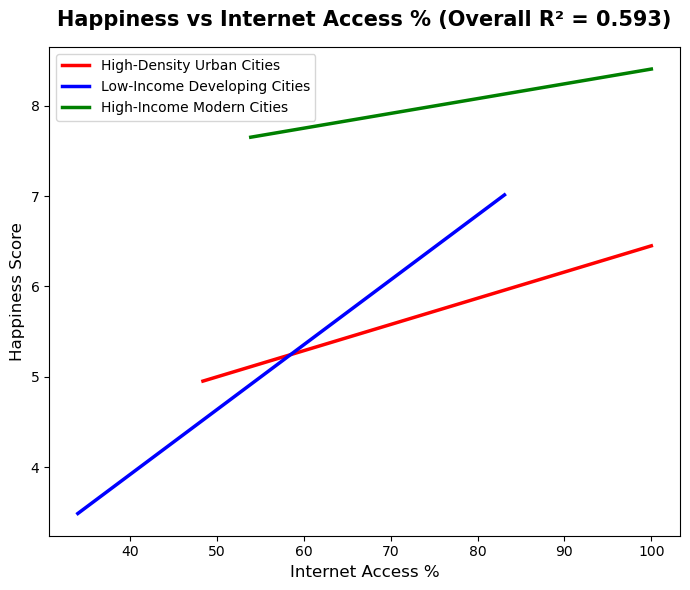

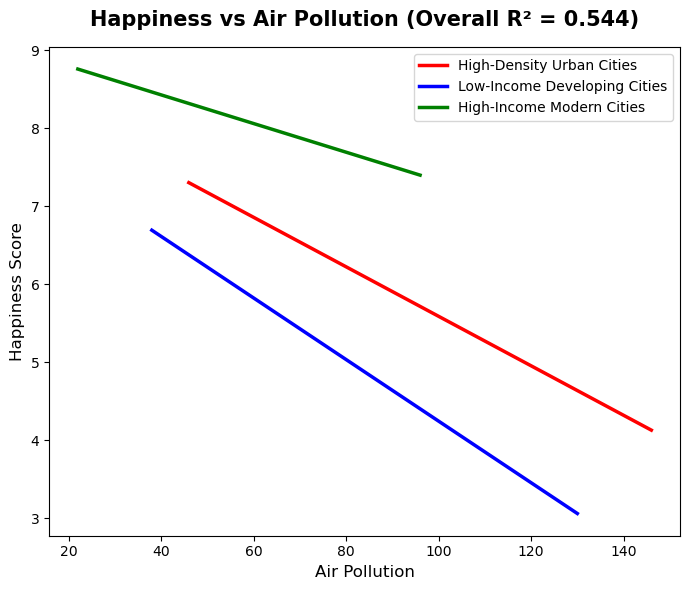

In [70]:
# Final selected predictors and display labels
models_to_train = {
    "avg_income": "Income",
    "avg_rent": "Rent",
    "internet_penetration": "Internet Access %",
    "air_quality_index": "Air Pollution"
}

# Cluster colors
color_map = {
    'High-Density Urban Cities': 'red',
    'Low-Income Developing Cities': 'blue',
    'High-Income Modern Cities': 'green'
}

for feature, label in models_to_train.items():
    plt.figure(figsize=(7, 6))

    # Overall model R² for context (trained on all data)
    X_all = df[[feature]].values
    y_all = df["happiness_score"].values
    reg_all = LinearRegression().fit(X_all, y_all)
    r2_all = r2_score(y_all, reg_all.predict(X_all))

    # Train + plot one regression line per cluster
    for cluster_label, cluster_color in color_map.items():
        subset = df[df["cluster_name"] == cluster_label]

        X = subset[[feature]].values
        y = subset["happiness_score"].values

        reg = LinearRegression().fit(X, y)

        x_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
        plt.plot(x_line, reg.predict(x_line),
                 color=cluster_color,
                 linewidth=2.5,
                 label=cluster_label)

    plt.title(f"Happiness vs {label} (Overall R² = {r2_all:.3f})",
              fontsize=15, fontweight="bold", pad=15)

    plt.xlabel(label, fontsize=12)
    plt.ylabel("Happiness Score", fontsize=12)

    plt.legend()
    plt.tight_layout()
    plt.show()
